x,y [0, 0] [3, 3]
gold distnace  [6]
x,y [0, 0] [3, 1]
wumpus distance  [4]
x,y [3, 1] [0, 0]
Agent distance  [4]
Discrete(16)
Discrete(6)
agent position [0, 0]
gold position [3, 3]
x,y [0, 0] [3, 3]
agent position [0, 0]
wumpus position [3, 1]
x,y [0, 0] [3, 1]
agent position [0, 0]
wumpus position [3, 1]
x,y [3, 1] [0, 0]
plot position [0, 0]
agent pos [0, 0]
plot position [1, 0]
agent pos [0, 0]
plot position [2, 0]
agent pos [0, 0]
plot position [3, 0]
agent pos [0, 0]
plot position [0, 1]
agent pos [0, 0]
plot position [1, 1]
agent pos [0, 0]
plot position [2, 1]
agent pos [0, 0]
plot position [3, 1]
agent pos [0, 0]
plot position [0, 2]
agent pos [0, 0]
plot position [1, 2]
agent pos [0, 0]
plot position [2, 2]
agent pos [0, 0]
plot position [3, 2]
agent pos [0, 0]
plot position [0, 3]
agent pos [0, 0]
plot position [1, 3]
agent pos [0, 0]
plot position [2, 3]
agent pos [0, 0]
plot position [3, 3]
agent pos [0, 0]


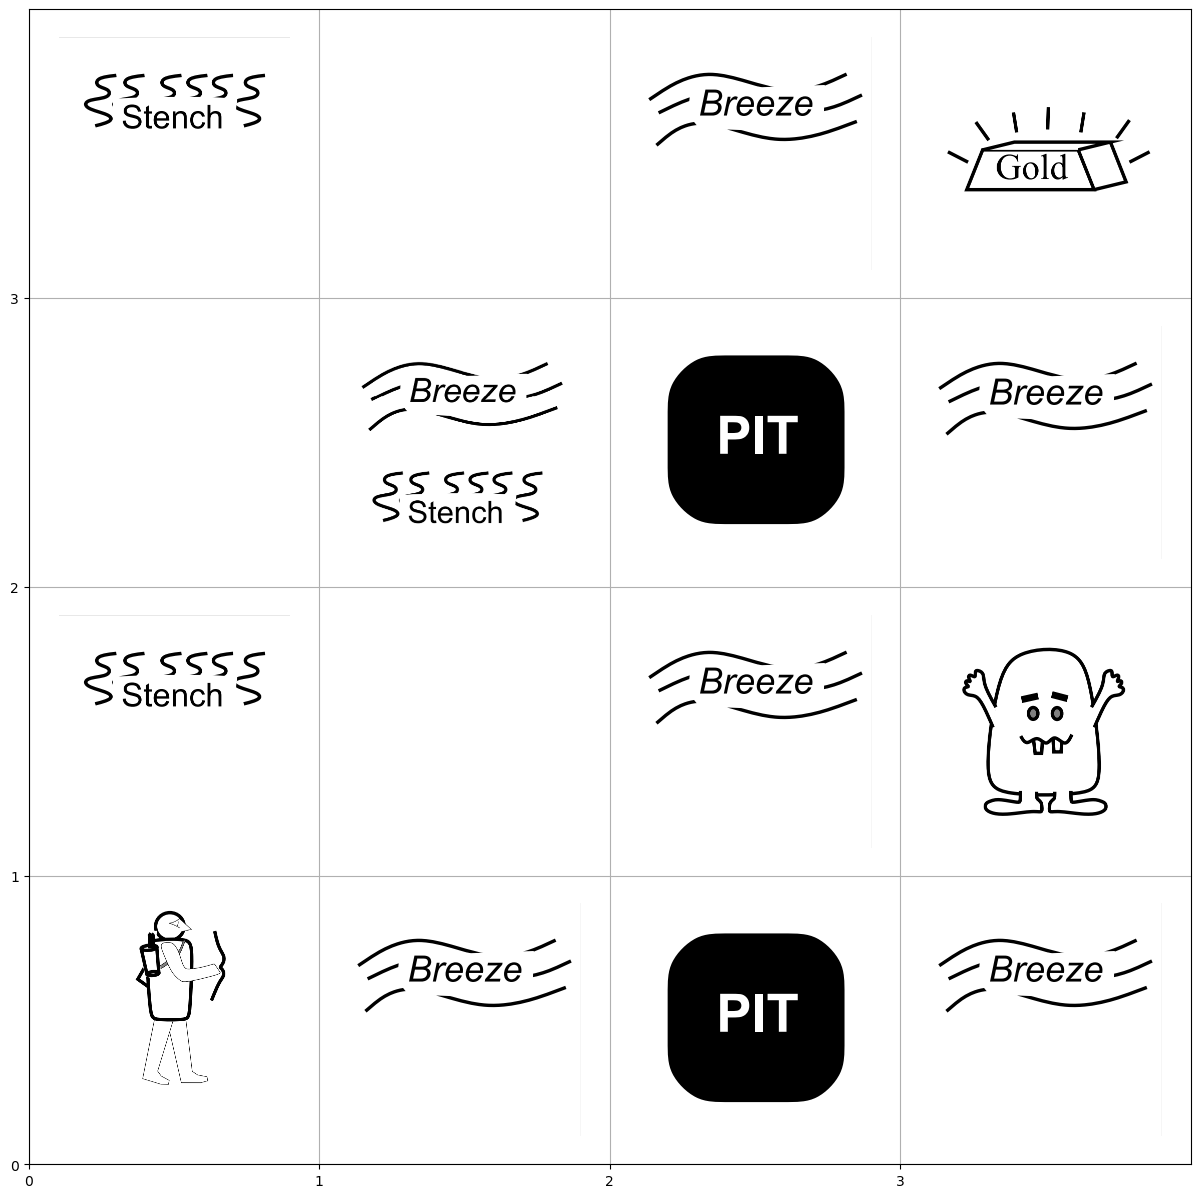

In [59]:
# Imports
import cv2
import gym
from gym import spaces
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
from operator import add
import random


# Defining the Multi-Agent Wumpus World Environment.
class MultiAgentWumpusWorldEnvironment(gym.Env):

    def __init__(self, environment_type):

        self.environment_type = environment_type  
                                                  
        self.observation_space = spaces.Discrete(16)  
        self.action_space = spaces.Discrete(6)  
                                                
        self.number_of_agents = 2  
        self.number_of_arrows = 10 
        self.arrows = self.number_of_arrows  
                                                                                    
        self.agent_position = [0, 0]  
        self.breeze_pos = [[1, 0], [1, 2], [2, 1], [2, 3], [3, 0], [3, 2]]  
                                                                          
        self.gold_pos = [3, 3]  
        self.gold_quantity = 1  
        self.pit_pos = [[2, 0], [2, 2]]  
        self.stench_pos = [[0, 1], [0, 3], [1, 2]]
        self.wumpus_pos = [3, 1] 
        self.wumpus_alive = True  
        self.timesteps = 0  
        self.max_timesteps = 10  
        # This defines the distance of the agents to the Gold.
        self.gold_distance = [self.compute_distance(self.agent_position, self.gold_pos)]
        print("gold distnace ", self.gold_distance)
        # This defines the distance of the agents to the Wumpus.
        self.wumpus_distance = [self.compute_distance(self.agent_position, self.wumpus_pos)]
        print("wumpus distance ", self.wumpus_distance)
        self.agent_distance = [self.compute_distance( self.wumpus_pos,self.agent_position)]
        print("Agent distance ", self.agent_distance)


    def reset(self, random_start=False):

        # Creating the mapping from the possible states the agent can start in to the co-ordinates.
        coordinates_state_mapping = {12: [0, 3], 13: [1, 3], 14: [2, 3],
                                     9: [1, 2], 11: [3, 2],
                                     4: [0, 1], 5: [1, 1], 6: [2, 1], 7: [3, 1],
                                     0: [0, 0], 1: [1, 0], 3: [3, 0]}

        if not random_start:
            self.agent_position = [0, 0]
            self.wumpus_pos = [3,1]
            observation = [0, 7]
           

        else:
            # Randomly selecting the agent's position.
            observation = [random.choice([0, 1, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14]) for
                           _ in range(self.number_of_agents)]
            print("random observation",observation)

            self.agent_position = coordinates_state_mapping[observation[0]]
            print("agents random pos",self.agent_position)
            self.wumpus_pos = coordinates_state_mapping[observation[1]]
            print("wunpus random position",self.wumpus_pos)
        # self.arrows = [self.number_of_arrows for _ in range(self.number_of_agents)] 
        self.arrows = self.number_of_arrows 
        self.wumpus_alive = True  
        self.gold_quantity = 1  
        self.timesteps = 0  
        # Resetting the distance of the agent to the Gold.
        print("agent position",self.agent_position)
        print("gold position",self.gold_pos)
        self.gold_distance = [self.compute_distance(self.agent_position, self.gold_pos)]
        # Resetting the distance of the agent to the Wumpus.
        print("agent position",self.agent_position)
        print("wumpus position",self.wumpus_pos)
        self.wumpus_distance = [self.compute_distance(self.agent_position, self.wumpus_pos)]
        print("agent position",self.agent_position)
        print("wumpus position",self.wumpus_pos)
        self.agent_distance = [self.compute_distance(self.wumpus_pos,self.agent_position)]

        return observation

    def step(self, actions):

        if self.environment_type == 'deterministic':
            # for i in range(self.number_of_agents):
                # Describing the outcomes of the various possible actions.
            if actions == 0:  # This action causes the agent to go right.
                self.agent_position[0] += 1
                self.wumpus_pos[0] += 1
            if actions == 1:  # This action causes the agent to go left.
                self.agent_position[0] -= 1
                self.wumpus_pos[0] -= 1
            if actions == 2:  # This action causes the agent to go up.
                self.agent_position[1] += 1
                self.wumpus_pos[1] += 1
            if actions == 3:  # This action causes the agent to go down.
                self.agent_position[1] -= 1
                self.wumpus_pos[1] -= 1
            if actions == 4:  # This action causes the agent to not move.
                self.agent_position = self.wumpus_pos
            if actions == 5:  # This action causes the agent to shoot an arrow.
                if self.arrows > 0:
                    self.arrows -= 1

        if self.environment_type == 'stochastic':
            # for i in range(self.number_of_agents):
            # Describing the outcomes of the various possible actions.
            if actions == 0:  # This action causes the agent to go right.
                probability = random.uniform(0, 1)
                if probability > 0.1:
                    self.agent_position[0] += 1
                    self.wumpus_pos[0] += 1
            if actions == 1:  # This action causes the agent to go left.
                probability = random.uniform(0, 1)
                if probability > 0.1:
                    self.agent_position[0] -= 1
                    self.wumpus_pos[0] -= 1
            if actions == 2:  # This action causes the agent to go up.
                probability = random.uniform(0, 1)
                if probability > 0.1:
                    self.agent_position[1] += 1
                    self.wumpus_pos[1] += 1
            if actions == 3:  # This action causes the agent to go down.
                probability = random.uniform(0, 1)
                if probability > 0.1:
                    self.agent_position[1] -= 1
                    self.wumpus_pos[1] -= 1
            if actions == 4:  # This action causes the agent to not move.
                probability = random.uniform(0, 1)
                if probability > 0.1:
                    self.agent_position = self.wumpus_pos
            if actions == 5:  # This action causes the agent to shoot an arrow.
                probability = random.uniform(0, 1)
                if probability > 0.1:
                    if self.arrows[i] > 0:
                        self.arrows[i] -= 1

        self.agent_position = np.clip(self.agent_position, a_min=0, a_max=3)

        # Computing the new distance of the agents to the Gold.
        new_gold_distance = [self.compute_distance(self.agent_position, self.gold_pos)]

        # Setting the rewards to 0.
        # rewards = [0 for _ in range(self.number_of_agents)]
        rewards = 0
        wumpus_rewards = 0

        # Giving the agents reward 10 for picking up the Gold.
        # for i in range(self.number_of_agents):
        if (self.agent_position == self.gold_pos).all():
            if self.gold_quantity > 0:
                self.gold_quantity -= 1
                rewards = 10
        if (self.wumpus_pos == self.agent_position).all():
            if self.gold_quantity > 0:
                self.gold_quantity -= 1
                wumpus_rewards = 10

        # Giving the agents different rewards if their distance to the Gold increases, decreases or remains the same.
        if self.gold_quantity > 0:
            # for i in range(self.number_of_agents):
            # If agent moves away from the Gold it gets reward -1.
            if new_gold_distance > self.gold_distance:
                rewards = -1
                self.gold_distance = new_gold_distance

            # If agent moves closer to the Gold it gets reward 1.
            elif new_gold_distance < self.gold_distance:
                rewards = 1
                self.gold_distance = new_gold_distance

            else:  # If agent's distance to the Gold doesn't change it gets reward 0.
                rewards = 0

        # Computing the new distance of the agents to the Wumpus.
        new_wumpus_distance = self.compute_distance(self.agent_position, self.wumpus_pos)

        # Giving the agents different rewards if their distance to the Wumpus increases, decreases or remains the same.
        # These reward will only come in when the Gold is collected.
        if self.gold_quantity == 0:
            # If agent moves away from the Wumpus it gets reward 1.
            # for i in range(self.number_of_agents):
            if new_wumpus_distance > self.wumpus_distance:
                rewards = 1
                self.wumpus_distance = new_wumpus_distance

            # If agent moves closer to the Wumpus it gets reward -1.
            elif new_wumpus_distance < self.wumpus_distance:
                rewards = -1
                self.wumpus_distance = new_wumpus_distance

            else:  # If the agent's distance to the Wumpus doesn't change it gets reward 0.
                rewards = 0

        new_agent_distance = self.compute_distance(self.wumpus_pos,self.agent_position)
        # Giving Wumpus different rewards if the distance to the Agnet increases, decreases or remains the same.
        # These reward will only come in when the Gold is collected.
        if self.gold_quantity == 0:
            # If wumpus moves away from the agent it gets reward -1.
            # for i in range(self.number_of_agents):
            if new_agent_distance > self.agent_distance:
                wumpus_rewards = -1
                self.agent_distance = new_agent_distance

            # If agent moves closer to the Wumpus it gets reward 1.
            elif new_agent_distance < self.agent_distance:
                wumpus_rewards = 1
                self.agnet_distance = new_agent_distance

            else:  # If the agent's distance to the Wumpus doesn't change it gets reward 0.
                wumpus_rewards = 0

        # Creating the mapping from the co-ordinates to the state.
        coordinates_state_mapping = {'[0 3]': 12, '[1 3]': 13, '[2 3]': 14, '[3 3]': 15,
                                     '[0 2]': 8, '[1 2]': 9, '[2 2]': 10, '[3 2]': 11,
                                     '[0 1]': 4, '[1 1]': 5, '[2 1]': 6, '[3 1]': 7,
                                     '[0 0]': 0, '[1 0]': 1, '[2 0]': 2, '[3 0]': 3}

        # Setting the observation to be the state occupied by the agent.
        
        observation = coordinates_state_mapping[f'{self.agent_position}']
        print("here")
        self.timesteps += 1  # Increasing the total number of steps taken by the agent.

        # Setting the reward to -1 if the agent falls into the pit.
        # for i in range(self.number_of_agents):
        for j in range(len(self.pit_pos)):
            if (self.agent_position == self.pit_pos[j]).all():
                rewards = -1

        # Setting the reward to -1 if the agent is killed by the Wumpus.
        if (self.agent_position == self.wumpus_pos).all():
            rewards = -1
            wumpus_rewards = 10
            self.wumpus_alive = True

        # Setting the reward to -1 for wumpus if the agent reaches gold.
        if (self.agent_position == self.gold_pos).all():
            wumpus_rewards = -1

        # Giving the agents reward 10 for killing the Wumpus.
        if all((self.wumpus_distance == 1 and actions == 5 and self.arrows > 0)):
            rewards = 10
            self.wumpus_alive = False

        # The episode terminates when agent picks the Gold and both agent kills the Wumpus,
        # or agent is killed by the Wumpus, falls into the pit, or takes more than 10 steps.
        if (self.gold_quantity == 0 and not self.wumpus_alive) or \
                any((self.agent_position == self.wumpus_pos).all()):
            done = True
        else:
            done = False
        for i in range(len(self.pit_pos)):
            if any((self.agent_position == self.pit_pos[i]).all()):
                done = True
        if self.timesteps == self.max_timesteps:
            done = True
        info = {}

        return observation, {"agents":rewards, "wumpus":wumpus_rewards}, done, info

    @staticmethod
    def compute_distance(x, y):
        print("x,y", x, y)
        if len(x) != 2 or len(y) != 2:
            raise ValueError("Each point should be represented as a list with two elements")
        distance = np.abs(x[0] - y[0]) + np.abs(x[1] - y[1])
        return distance

    def render(self, mode='human', plot=False):
        # Initializing the figure.
        fig, ax = plt.subplots(figsize=(15, 15))
        # Setting the limit on the x-axis.  
        ax.set_xlim(0, 4)
        # Setting the limit on the y-axis.  
        ax.set_ylim(0, 4)  

        def plot_image(plot_pos):

            # Initially setting every object to not be plotted.
            plot_agent, plot_breeze, plot_gold, plot_pit, plot_stench, plot_wumpus = \
                False, False, False, False, False, False
            print("plot position",plot_pos)
            print("agent pos", self.agent_position)

            # Checking which objects need to be plotted by comparing their positions.
            if plot_pos == self.agent_position:
                plot_agent = True
            for i in range(len(self.breeze_pos)):
                if plot_pos == self.breeze_pos[i]:
                    plot_breeze = True
            if self.gold_quantity > 0:  # Gold isn't plotted if it has already been picked by one of the agents.
                if plot_pos == self.gold_pos:
                    plot_gold = True
            for i in range(len(self.pit_pos)):
                if plot_pos == self.pit_pos[i]:
                    plot_pit = True
            for i in range(len(self.stench_pos)):
                if plot_pos == self.stench_pos[i]:
                    plot_stench = True
            if plot_pos == self.wumpus_pos:
                plot_wumpus = True

            # Plot for Agent.
            if plot_agent and \
                    all(not item for item in
                        [ plot_breeze, plot_gold, plot_pit, plot_stench, plot_wumpus]):
                agent = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/agent.png'), zoom=0.36),
                                         list(map(add, plot_pos, [0.5, 0.5])), frameon=False)
                ax.add_artist(agent)

            # Plot for Breeze.
            if plot_breeze and \
                    all(not item for item in
                        [plot_agent, plot_gold, plot_pit, plot_stench, plot_wumpus]):
                breeze = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/breeze.png'), zoom=0.36),
                                        list(map(add, plot_pos, [0.5, 0.5])), frameon=False)
                ax.add_artist(breeze)

            # Plot for Gold.
            if plot_gold and \
                    all(not item for item in
                        [plot_agent, plot_breeze, plot_pit, plot_stench, plot_wumpus]):
                gold = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/gold.png'), zoom=0.36),
                                      list(map(add, plot_pos, [0.5, 0.5])), frameon=False)
                ax.add_artist(gold)

            # Plot for Pit.
            if plot_pit and \
                    all(not item for item in
                        [plot_agent, plot_breeze, plot_gold, plot_stench, plot_wumpus]):
                pit = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/pit.png'), zoom=0.36),
                                     list(map(add, plot_pos, [0.5, 0.5])), frameon=False)
                ax.add_artist(pit)

            # Plot for Stench.
            if plot_stench and \
                    all(not item for item in
                        [plot_agent, plot_breeze, plot_gold, plot_pit, plot_wumpus]):
                stench = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/stench.png'), zoom=0.36),
                                        list(map(add, plot_pos, [0.5, 0.5])), frameon=False)
                ax.add_artist(stench)

            # Plot for alive Wumpus.
            if self.wumpus_alive:
                if plot_wumpus and \
                        all(not item for item in
                            [plot_agent, plot_breeze, plot_gold, plot_pit, plot_stench]):
                    wumpus_alive = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/wumpus.png'), zoom=0.36),
                                                  list(map(add, plot_pos, [0.5, 0.5])), frameon=False)
                    ax.add_artist(wumpus_alive)

            # Plot for dead Wumpus.
            if not self.wumpus_alive:
                if plot_wumpus and \
                        all(not item for item in
                            [plot_agent, plot_breeze, plot_gold, plot_pit, plot_stench]):
                    wumpus_dead = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/wumpus_dead.png'), zoom=0.36),
                                                 list(map(add, plot_pos, [0.5, 0.5])), frameon=False)
                    ax.add_artist(wumpus_dead)



            # Plot for Agent  and Breeze.
            if all(item for item in [plot_agent, plot_breeze]) and \
                    all(not item for item in
                        [ plot_gold, plot_pit, plot_stench, plot_wumpus]):
                agent_breeze = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/agent_breeze.png'), zoom=0.36),
                                                list(map(add, plot_pos, [0.5, 0.5])), frameon=False)
                ax.add_artist(agent_breeze)


            # Plot for Agent  and Pit.
            if all(item for item in [plot_agent, plot_pit]) and \
                    all(not item for item in
                        [ plot_breeze, plot_gold, plot_stench, plot_wumpus]):
                agent_pit = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/agent_dead_pit.png'), zoom=0.36),
                                             list(map(add, plot_pos, [0.5, 0.5])), frameon=False)
                ax.add_artist(agent_pit)

            # Plot for Agent  and Stench.
            if all(item for item in [plot_agent, plot_stench]) and \
                    all(not item for item in
                        [ plot_breeze, plot_gold, plot_pit, plot_wumpus]):
                agent_stench = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/agent_stench.png'), zoom=0.36),
                                                list(map(add, plot_pos, [0.5, 0.5])), frameon=False)
                ax.add_artist(agent_stench)


            # Plot for Agent , Breeze, Stench.
            if all(item for item in [plot_agent, plot_breeze, plot_stench]) and \
                    all(not item for item in
                        [ plot_gold, plot_pit, plot_wumpus]):
                agent_1_breeze_stench = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/agent_breeze_stench.png'),
                                                                   zoom=0.36), list(map(add, plot_pos, [0.5, 0.5])),
                                                       frameon=False)
                ax.add_artist(agent_1_breeze_stench)

            # Plot for Breeze and Gold.
            if all(item for item in [plot_breeze, plot_gold]) and \
                    all(not item for item in
                        [plot_agent, plot_pit, plot_stench, plot_wumpus]):
                breeze_gold = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/breeze_gold.png'), zoom=0.36),
                                             list(map(add, plot_pos, [0.5, 0.5])), frameon=False)
                ax.add_artist(breeze_gold)

            # Plot for Breeze and Stench.
            if all(item for item in [plot_breeze, plot_stench]) and \
                    all(not item for item in
                        [plot_agent, plot_gold, plot_pit, plot_wumpus]):
                breeze_stench = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/breeze_stench.png'), zoom=0.36),
                                               list(map(add, plot_pos, [0.5, 0.5])), frameon=False)
                ax.add_artist(breeze_stench)

            # Plot for Breeze, Stench, and Gold.
            if all(item for item in [plot_breeze, plot_gold, plot_stench]) and \
                    all(not item for item in
                        [plot_agent, plot_pit, plot_wumpus]):
                breeze_gold_stench = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/breeze_gold_stench.png'),
                                                    zoom=0.36), list(map(add, plot_pos, [0.5, 0.5])), frameon=False)
                ax.add_artist(breeze_gold_stench)

            # Plot for Stench and Gold.
            if all(item for item in [plot_stench, plot_gold]) and \
                    all(not item for item in
                        [plot_agent, plot_breeze, plot_pit, plot_wumpus]):
                stench_gold = AnnotationBbox(OffsetImage(plt.imread('/Users/tanmaireddy/Documents/CSE546/Repeat/multiagent_env_with_ppo/images/stench.png'), zoom=0.36),
                                             list(map(add, plot_pos, [0.5, 0.5])), frameon=False)
                ax.add_artist(stench_gold)

        # Dictionary mapping the states to their co-ordinates.
        coordinates_state_mapping = {
            12: [0, 3], 13: [1, 3], 14: [2, 3], 15: [3, 3],
            8: [0, 2], 9: [1, 2], 10: [2, 2], 11: [3, 2],
            4: [0, 1], 5: [1, 1], 6: [2, 1], 7: [3, 1],
            0: [0, 0], 1: [1, 0], 2: [2, 0], 3: [3, 0]}

        # Rendering the images for all states.
        for state in range(self.observation_space.n):
            plot_image(coordinates_state_mapping[state])

        plt.xticks([0, 1, 2, 3]) 
        plt.yticks([0, 1, 2, 3])  
        plt.grid()  

        if plot:  
            plt.show()
        else:  
            fig.canvas.draw()
            img = np.array(fig.canvas.renderer.buffer_rgba())[:, :, :1]
            width = int(img.shape[1] * 84 / 1000)
            height = int(img.shape[0] * 84 / 1000)
            dim = (width, height)
            preprocessed_image = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
            return preprocessed_image

wumpus_world = MultiAgentWumpusWorldEnvironment(environment_type='deterministic')
print(wumpus_world.observation_space)
print(wumpus_world.action_space)
wumpus_world.reset(random_start=False)
wumpus_world.render(plot=True)